## ch01. Dataset

- underfitting
- overfitting

- hyperparameter
  - 학습 방법을 결정하는 파라미터
  - validation  set으로 튜닝


- overfitting 현상으로 간주
  - training set의 평가는 오류가 낮아지지만
  - validation set의 평가는 오류가 높아지는 현상 

- cross-validation: 교차 검증
  - 적용 방법
    - 1차: data1, data2, data3, data4, (data5)
    - 2차: data1, data2, data3, (data4), data5
    - 3차: data1, data2, (data3), data4, data5
    - 4차: data1, (data2), data3, data4, data5
    - 5차: (data1), data2, data3, data4, data5
    - 평균으로 검증
    - 각회차에서 학습 결과는 초기화 시킴
  - 데이터가 많지 않을 경우에 사용 함 

##  ch02. 학습과정 이야기

```
model.fit(x, y, batch_size=32, epoch=10)
```

## ch03. 학습과정 살펴보기

```
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)
hist.history['loss']
hist.history['acc']
hist.history['val_loss']
hist.history['val_acc']
```

- loss: epoch 별 훈련 손실값
- acc:  epoch 별 훈련 정확도
- val_loss: epoch 별 검증 손실값
- val_acc: epoch 별 검증 정확도

### 학습 과정 모니터링

In [37]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [38]:
np.random.seed(3)

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- Training/Test/Validation Set 구성

In [40]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

- 데이터 전처리

In [41]:
x_train = x_train.reshape((50000, 28*28)).astype("float")/255.0
x_val = x_val.reshape((10000, 28*28)).astype("float")/255.0
x_test = x_test.reshape((10000, 28*28)).astype('float')/255.0

- 훈련셋과 검승셋 고르기

In [42]:
train_rand_index = np.random.choice(50000, 700)
val_rand_index = np.random.choice(10000, 300)
x_train = x_train[train_rand_index]
y_train = y_train[train_rand_index]
x_val = x_val[val_rand_index]
y_val = y_val[val_rand_index]

- 라벨 인코딩

In [43]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [44]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

- 모델 학습과정 설정하기

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

- 모델 학습시키기

In [46]:
hist = model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val))

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 267us/step - loss: 2.1192 - acc: 0.2929 - val_loss: 1.9095 - val_acc: 0.4467
Epoch 2/1000
700/700 [==============================] - 0s 182us/step - loss: 1.6806 - acc: 0.5886 - val_loss: 1.5444 - val_acc: 0.6267
Epoch 3/1000
700/700 [==============================] - 0s 157us/step - loss: 1.3294 - acc: 0.7229 - val_loss: 1.2420 - val_acc: 0.7400
Epoch 4/1000
700/700 [==============================] - 0s 153us/step - loss: 1.0708 - acc: 0.8000 - val_loss: 1.0379 - val_acc: 0.7633
Epoch 5/1000
700/700 [==============================] - 0s 162us/step - loss: 0.8955 - acc: 0.8300 - val_loss: 0.9051 - val_acc: 0.7700
Epoch 6/1000
700/700 [==============================] - 0s 153us/step - loss: 0.7695 - acc: 0.8514 - val_loss: 0.8144 - val_acc: 0.7933
Epoch 7/1000
700/700 [==============================] - 0s 155us/step - loss: 0.6783 - acc: 0.8729 - val_loss: 0.7430 - val_acc: 0.8033
Ep

700/700 [==============================] - 0s 173us/step - loss: 0.0771 - acc: 0.9943 - val_loss: 0.4768 - val_acc: 0.8533
Epoch 61/1000
700/700 [==============================] - 0s 164us/step - loss: 0.0756 - acc: 0.9929 - val_loss: 0.4758 - val_acc: 0.8567
Epoch 62/1000
700/700 [==============================] - 0s 165us/step - loss: 0.0736 - acc: 0.9957 - val_loss: 0.4766 - val_acc: 0.8567
Epoch 63/1000
700/700 [==============================] - 0s 186us/step - loss: 0.0722 - acc: 0.9957 - val_loss: 0.4761 - val_acc: 0.8600
Epoch 64/1000
700/700 [==============================] - 0s 173us/step - loss: 0.0702 - acc: 0.9971 - val_loss: 0.4744 - val_acc: 0.8600
Epoch 65/1000
700/700 [==============================] - 0s 173us/step - loss: 0.0685 - acc: 0.9971 - val_loss: 0.4769 - val_acc: 0.8600
Epoch 66/1000
700/700 [==============================] - 0s 169us/step - loss: 0.0668 - acc: 0.9986 - val_loss: 0.4811 - val_acc: 0.8633
Epoch 67/1000
700/700 [==============================] 

Epoch 120/1000
700/700 [==============================] - 0s 212us/step - loss: 0.0267 - acc: 1.0000 - val_loss: 0.5063 - val_acc: 0.8667
Epoch 121/1000
700/700 [==============================] - 0s 194us/step - loss: 0.0264 - acc: 1.0000 - val_loss: 0.5060 - val_acc: 0.8667
Epoch 122/1000
700/700 [==============================] - 0s 198us/step - loss: 0.0261 - acc: 1.0000 - val_loss: 0.5072 - val_acc: 0.8667
Epoch 123/1000
700/700 [==============================] - 0s 200us/step - loss: 0.0257 - acc: 1.0000 - val_loss: 0.5084 - val_acc: 0.8667
Epoch 124/1000
700/700 [==============================] - 0s 204us/step - loss: 0.0254 - acc: 1.0000 - val_loss: 0.5104 - val_acc: 0.8667
Epoch 125/1000
700/700 [==============================] - 0s 199us/step - loss: 0.0251 - acc: 1.0000 - val_loss: 0.5083 - val_acc: 0.8667
Epoch 126/1000
700/700 [==============================] - 0s 195us/step - loss: 0.0248 - acc: 1.0000 - val_loss: 0.5101 - val_acc: 0.8700
Epoch 127/1000
700/700 [==========

700/700 [==============================] - 0s 175us/step - loss: 0.0147 - acc: 1.0000 - val_loss: 0.5321 - val_acc: 0.8700
Epoch 180/1000
700/700 [==============================] - 0s 176us/step - loss: 0.0146 - acc: 1.0000 - val_loss: 0.5318 - val_acc: 0.8700
Epoch 181/1000
700/700 [==============================] - 0s 170us/step - loss: 0.0144 - acc: 1.0000 - val_loss: 0.5325 - val_acc: 0.8700
Epoch 182/1000
700/700 [==============================] - 0s 177us/step - loss: 0.0143 - acc: 1.0000 - val_loss: 0.5330 - val_acc: 0.8700
Epoch 183/1000
700/700 [==============================] - 0s 185us/step - loss: 0.0142 - acc: 1.0000 - val_loss: 0.5336 - val_acc: 0.8700
Epoch 184/1000
700/700 [==============================] - 0s 193us/step - loss: 0.0141 - acc: 1.0000 - val_loss: 0.5335 - val_acc: 0.8667
Epoch 185/1000
700/700 [==============================] - 0s 172us/step - loss: 0.0140 - acc: 1.0000 - val_loss: 0.5334 - val_acc: 0.8700
Epoch 186/1000
700/700 [=========================

700/700 [==============================] - 0s 172us/step - loss: 0.0098 - acc: 1.0000 - val_loss: 0.5520 - val_acc: 0.8667
Epoch 239/1000
700/700 [==============================] - 0s 171us/step - loss: 0.0097 - acc: 1.0000 - val_loss: 0.5523 - val_acc: 0.8633
Epoch 240/1000
700/700 [==============================] - 0s 172us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.5526 - val_acc: 0.8667
Epoch 241/1000
700/700 [==============================] - 0s 176us/step - loss: 0.0096 - acc: 1.0000 - val_loss: 0.5527 - val_acc: 0.8667
Epoch 242/1000
700/700 [==============================] - 0s 173us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 0.5533 - val_acc: 0.8667
Epoch 243/1000
700/700 [==============================] - 0s 191us/step - loss: 0.0095 - acc: 1.0000 - val_loss: 0.5531 - val_acc: 0.8667
Epoch 244/1000
700/700 [==============================] - 0s 166us/step - loss: 0.0094 - acc: 1.0000 - val_loss: 0.5534 - val_acc: 0.8667
Epoch 245/1000
700/700 [=========================

700/700 [==============================] - 0s 174us/step - loss: 0.0072 - acc: 1.0000 - val_loss: 0.5676 - val_acc: 0.8667
Epoch 298/1000
700/700 [==============================] - 0s 182us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.5682 - val_acc: 0.8667
Epoch 299/1000
700/700 [==============================] - 0s 168us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.5685 - val_acc: 0.8667
Epoch 300/1000
700/700 [==============================] - 0s 165us/step - loss: 0.0071 - acc: 1.0000 - val_loss: 0.5686 - val_acc: 0.8667
Epoch 301/1000
700/700 [==============================] - 0s 173us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5685 - val_acc: 0.8667
Epoch 302/1000
700/700 [==============================] - 0s 184us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5690 - val_acc: 0.8667
Epoch 303/1000
700/700 [==============================] - 0s 174us/step - loss: 0.0070 - acc: 1.0000 - val_loss: 0.5691 - val_acc: 0.8667
Epoch 304/1000
700/700 [=========================

700/700 [==============================] - 0s 172us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.5807 - val_acc: 0.8700
Epoch 357/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0056 - acc: 1.0000 - val_loss: 0.5807 - val_acc: 0.8700
Epoch 358/1000
700/700 [==============================] - 0s 170us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.5812 - val_acc: 0.8700
Epoch 359/1000
700/700 [==============================] - 0s 171us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.5815 - val_acc: 0.8700
Epoch 360/1000
700/700 [==============================] - 0s 177us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.5816 - val_acc: 0.8700
Epoch 361/1000
700/700 [==============================] - 0s 186us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.5817 - val_acc: 0.8700
Epoch 362/1000
700/700 [==============================] - 0s 174us/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.5819 - val_acc: 0.8700
Epoch 363/1000
700/700 [=========================

700/700 [==============================] - 0s 173us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.5921 - val_acc: 0.8667
Epoch 416/1000
700/700 [==============================] - 0s 183us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.5922 - val_acc: 0.8667
Epoch 417/1000
700/700 [==============================] - 0s 174us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.5923 - val_acc: 0.8667
Epoch 418/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.5926 - val_acc: 0.8700
Epoch 419/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.5927 - val_acc: 0.8700
Epoch 420/1000
700/700 [==============================] - 0s 186us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.5930 - val_acc: 0.8667
Epoch 421/1000
700/700 [==============================] - 0s 185us/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.5932 - val_acc: 0.8667
Epoch 422/1000
700/700 [=========================

700/700 [==============================] - 0s 183us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.6017 - val_acc: 0.8667
Epoch 475/1000
700/700 [==============================] - 0s 179us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.6019 - val_acc: 0.8667
Epoch 476/1000
700/700 [==============================] - 0s 185us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.6020 - val_acc: 0.8667
Epoch 477/1000
700/700 [==============================] - 0s 180us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.6023 - val_acc: 0.8667
Epoch 478/1000
700/700 [==============================] - 0s 178us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.6024 - val_acc: 0.8667
Epoch 479/1000
700/700 [==============================] - 0s 180us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.6025 - val_acc: 0.8667
Epoch 480/1000
700/700 [==============================] - 0s 178us/step - loss: 0.0038 - acc: 1.0000 - val_loss: 0.6027 - val_acc: 0.8667
Epoch 481/1000
700/700 [=========================

700/700 [==============================] - 0s 178us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6108 - val_acc: 0.8667
Epoch 534/1000
700/700 [==============================] - 0s 199us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6107 - val_acc: 0.8667
Epoch 535/1000
700/700 [==============================] - 0s 175us/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.6109 - val_acc: 0.8633
Epoch 536/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6112 - val_acc: 0.8633
Epoch 537/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6111 - val_acc: 0.8633
Epoch 538/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6114 - val_acc: 0.8700
Epoch 539/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0032 - acc: 1.0000 - val_loss: 0.6114 - val_acc: 0.8633
Epoch 540/1000
700/700 [=========================

700/700 [==============================] - 0s 191us/step - loss: 0.0029 - acc: 1.0000 - val_loss: 0.6183 - val_acc: 0.8667
Epoch 593/1000
700/700 [==============================] - 0s 199us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6183 - val_acc: 0.8667
Epoch 594/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6186 - val_acc: 0.8667
Epoch 595/1000
700/700 [==============================] - 0s 187us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6187 - val_acc: 0.8667
Epoch 596/1000
700/700 [==============================] - 0s 195us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6189 - val_acc: 0.8667
Epoch 597/1000
700/700 [==============================] - 0s 204us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6191 - val_acc: 0.8667
Epoch 598/1000
700/700 [==============================] - 0s 189us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.6192 - val_acc: 0.8667
Epoch 599/1000
700/700 [=========================

700/700 [==============================] - 0s 188us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6254 - val_acc: 0.8667
Epoch 652/1000
700/700 [==============================] - 0s 207us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6255 - val_acc: 0.8667
Epoch 653/1000
700/700 [==============================] - 0s 208us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6257 - val_acc: 0.8667
Epoch 654/1000
700/700 [==============================] - 0s 204us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6258 - val_acc: 0.8667
Epoch 655/1000
700/700 [==============================] - 0s 208us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6259 - val_acc: 0.8667
Epoch 656/1000
700/700 [==============================] - 0s 184us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6261 - val_acc: 0.8667
Epoch 657/1000
700/700 [==============================] - 0s 192us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.6262 - val_acc: 0.8667
Epoch 658/1000
700/700 [=========================

700/700 [==============================] - 0s 197us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6320 - val_acc: 0.8700
Epoch 711/1000
700/700 [==============================] - 0s 193us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6320 - val_acc: 0.8700
Epoch 712/1000
700/700 [==============================] - 0s 192us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.6321 - val_acc: 0.8700
Epoch 713/1000
700/700 [==============================] - 0s 196us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6322 - val_acc: 0.8700
Epoch 714/1000
700/700 [==============================] - 0s 201us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6324 - val_acc: 0.8700
Epoch 715/1000
700/700 [==============================] - 0s 201us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6324 - val_acc: 0.8700
Epoch 716/1000
700/700 [==============================] - 0s 197us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.6326 - val_acc: 0.8700
Epoch 717/1000
700/700 [=========================

700/700 [==============================] - 0s 231us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6379 - val_acc: 0.8700
Epoch 770/1000
700/700 [==============================] - 0s 207us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6380 - val_acc: 0.8700
Epoch 771/1000
700/700 [==============================] - 0s 199us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6380 - val_acc: 0.8700
Epoch 772/1000
700/700 [==============================] - 0s 217us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6382 - val_acc: 0.8700
Epoch 773/1000
700/700 [==============================] - 0s 205us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6382 - val_acc: 0.8700
Epoch 774/1000
700/700 [==============================] - 0s 210us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6383 - val_acc: 0.8700
Epoch 775/1000
700/700 [==============================] - 0s 201us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.6384 - val_acc: 0.8700
Epoch 776/1000
700/700 [=========================

700/700 [==============================] - 0s 205us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6429 - val_acc: 0.8700
Epoch 829/1000
700/700 [==============================] - 0s 203us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6430 - val_acc: 0.8700
Epoch 830/1000
700/700 [==============================] - 0s 200us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6431 - val_acc: 0.8700
Epoch 831/1000
700/700 [==============================] - 0s 213us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6432 - val_acc: 0.8700
Epoch 832/1000
700/700 [==============================] - 0s 215us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.6433 - val_acc: 0.8700
Epoch 833/1000
700/700 [==============================] - 0s 211us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6434 - val_acc: 0.8700
Epoch 834/1000
700/700 [==============================] - ETA: 0s - loss: 0.0018 - acc: 1.000 - 0s 222us/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.6435 - val_acc: 0.8700
Epoch 835/1

700/700 [==============================] - 0s 221us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6476 - val_acc: 0.8667
Epoch 888/1000
700/700 [==============================] - 0s 220us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6477 - val_acc: 0.8667
Epoch 889/1000
700/700 [==============================] - 0s 216us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6479 - val_acc: 0.8667
Epoch 890/1000
700/700 [==============================] - 0s 211us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6479 - val_acc: 0.8667
Epoch 891/1000
700/700 [==============================] - 0s 226us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6480 - val_acc: 0.8667
Epoch 892/1000
700/700 [==============================] - 0s 221us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6480 - val_acc: 0.8667
Epoch 893/1000
700/700 [==============================] - 0s 216us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6480 - val_acc: 0.8667
Epoch 894/1000
700/700 [=========================

700/700 [==============================] - 0s 218us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6520 - val_acc: 0.8667
Epoch 947/1000
700/700 [==============================] - 0s 222us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6521 - val_acc: 0.8667
Epoch 948/1000
700/700 [==============================] - 0s 212us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6522 - val_acc: 0.8667
Epoch 949/1000
700/700 [==============================] - 0s 234us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6522 - val_acc: 0.8667
Epoch 950/1000
700/700 [==============================] - 0s 232us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6523 - val_acc: 0.8667
Epoch 951/1000
700/700 [==============================] - 0s 218us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6524 - val_acc: 0.8667
Epoch 952/1000
700/700 [==============================] - 0s 221us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.6525 - val_acc: 0.8667
Epoch 953/1000
700/700 [=========================

- 학습 과정 살펴보기

In [47]:
import matplotlib.pyplot as plt

In [48]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

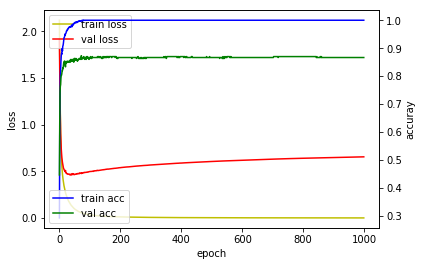

In [49]:
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 텐서플로우 연동

In [50]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(X_train, Y_train, epochs=1000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[tb_hist])


Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 0s 158us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 123us/step - loss: 2.2071 - acc: 0.1671 - val_loss: 2.1907 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 118us/step - loss: 2.1728 - acc: 0.1729 - val_loss: 2.1629 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 117us/step - loss: 2.1439 - acc: 0.1786 - val_loss: 2.1369 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 128us/step - loss: 2.1174 - acc: 0.1900 - val_loss: 2.1138 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 128us/step - loss: 2.0937 - acc: 0.2029 - val_loss: 2.0924 - val_acc: 0.2033
Epoch 7/1000
700/700 [==============================] - 0s 127us/step - loss: 2.0715 - acc: 0.2086 - val_loss: 2.0723 - val_acc: 0.2067
Ep

700/700 [==============================] - 0s 154us/step - loss: 1.7549 - acc: 0.2614 - val_loss: 1.8262 - val_acc: 0.2467
Epoch 61/1000
700/700 [==============================] - 0s 126us/step - loss: 1.7563 - acc: 0.2814 - val_loss: 1.8339 - val_acc: 0.2400
Epoch 62/1000
700/700 [==============================] - 0s 123us/step - loss: 1.7528 - acc: 0.2700 - val_loss: 1.8314 - val_acc: 0.2267
Epoch 63/1000
700/700 [==============================] - 0s 116us/step - loss: 1.7502 - acc: 0.2871 - val_loss: 1.8304 - val_acc: 0.2033
Epoch 64/1000
700/700 [==============================] - 0s 125us/step - loss: 1.7481 - acc: 0.2771 - val_loss: 1.8269 - val_acc: 0.2200
Epoch 65/1000
700/700 [==============================] - 0s 119us/step - loss: 1.7454 - acc: 0.2829 - val_loss: 1.8299 - val_acc: 0.2000
Epoch 66/1000
700/700 [==============================] - 0s 128us/step - loss: 1.7436 - acc: 0.2800 - val_loss: 1.8299 - val_acc: 0.2067
Epoch 67/1000
700/700 [==============================] 

Epoch 120/1000
700/700 [==============================] - 0s 116us/step - loss: 1.6660 - acc: 0.3143 - val_loss: 1.8210 - val_acc: 0.2200
Epoch 121/1000
700/700 [==============================] - 0s 118us/step - loss: 1.6646 - acc: 0.3043 - val_loss: 1.8119 - val_acc: 0.2233
Epoch 122/1000
700/700 [==============================] - 0s 115us/step - loss: 1.6636 - acc: 0.3186 - val_loss: 1.8204 - val_acc: 0.2133
Epoch 123/1000
700/700 [==============================] - 0s 117us/step - loss: 1.6633 - acc: 0.3100 - val_loss: 1.8142 - val_acc: 0.2200
Epoch 124/1000
700/700 [==============================] - 0s 117us/step - loss: 1.6618 - acc: 0.3114 - val_loss: 1.8213 - val_acc: 0.2167
Epoch 125/1000
700/700 [==============================] - 0s 121us/step - loss: 1.6607 - acc: 0.3257 - val_loss: 1.8227 - val_acc: 0.2300
Epoch 126/1000
700/700 [==============================] - 0s 119us/step - loss: 1.6591 - acc: 0.3100 - val_loss: 1.8252 - val_acc: 0.2267
Epoch 127/1000
700/700 [==========

700/700 [==============================] - 0s 118us/step - loss: 1.6139 - acc: 0.3343 - val_loss: 1.8371 - val_acc: 0.2200
Epoch 180/1000
700/700 [==============================] - 0s 120us/step - loss: 1.6114 - acc: 0.3357 - val_loss: 1.8429 - val_acc: 0.2667
Epoch 181/1000
700/700 [==============================] - 0s 116us/step - loss: 1.6119 - acc: 0.3400 - val_loss: 1.8354 - val_acc: 0.2600
Epoch 182/1000
700/700 [==============================] - 0s 117us/step - loss: 1.6110 - acc: 0.3429 - val_loss: 1.8384 - val_acc: 0.2133
Epoch 183/1000
700/700 [==============================] - 0s 117us/step - loss: 1.6119 - acc: 0.3300 - val_loss: 1.8459 - val_acc: 0.2300
Epoch 184/1000
700/700 [==============================] - 0s 115us/step - loss: 1.6097 - acc: 0.3386 - val_loss: 1.8474 - val_acc: 0.2267
Epoch 185/1000
700/700 [==============================] - 0s 123us/step - loss: 1.6080 - acc: 0.3414 - val_loss: 1.8661 - val_acc: 0.2200
Epoch 186/1000
700/700 [=========================

700/700 [==============================] - 0s 117us/step - loss: 1.5781 - acc: 0.3414 - val_loss: 1.8657 - val_acc: 0.2133
Epoch 239/1000
700/700 [==============================] - 0s 127us/step - loss: 1.5777 - acc: 0.3529 - val_loss: 1.8722 - val_acc: 0.2300
Epoch 240/1000
700/700 [==============================] - 0s 110us/step - loss: 1.5756 - acc: 0.3500 - val_loss: 1.8785 - val_acc: 0.2567
Epoch 241/1000
700/700 [==============================] - 0s 115us/step - loss: 1.5755 - acc: 0.3500 - val_loss: 1.8778 - val_acc: 0.2467
Epoch 242/1000
700/700 [==============================] - 0s 114us/step - loss: 1.5750 - acc: 0.3486 - val_loss: 1.8770 - val_acc: 0.2067
Epoch 243/1000
700/700 [==============================] - 0s 118us/step - loss: 1.5750 - acc: 0.3586 - val_loss: 1.8844 - val_acc: 0.2167
Epoch 244/1000
700/700 [==============================] - 0s 111us/step - loss: 1.5720 - acc: 0.3543 - val_loss: 1.8761 - val_acc: 0.2100
Epoch 245/1000
700/700 [=========================

700/700 [==============================] - 0s 111us/step - loss: 1.5487 - acc: 0.3543 - val_loss: 1.9209 - val_acc: 0.2133
Epoch 298/1000
700/700 [==============================] - 0s 117us/step - loss: 1.5487 - acc: 0.3486 - val_loss: 1.9012 - val_acc: 0.2267
Epoch 299/1000
700/700 [==============================] - 0s 124us/step - loss: 1.5495 - acc: 0.3643 - val_loss: 1.9196 - val_acc: 0.2300
Epoch 300/1000
700/700 [==============================] - 0s 121us/step - loss: 1.5482 - acc: 0.3657 - val_loss: 1.9083 - val_acc: 0.2300
Epoch 301/1000
700/700 [==============================] - 0s 120us/step - loss: 1.5480 - acc: 0.3643 - val_loss: 1.8985 - val_acc: 0.2167
Epoch 302/1000
700/700 [==============================] - 0s 116us/step - loss: 1.5491 - acc: 0.3600 - val_loss: 1.9147 - val_acc: 0.2133
Epoch 303/1000
700/700 [==============================] - 0s 119us/step - loss: 1.5475 - acc: 0.3543 - val_loss: 1.9081 - val_acc: 0.2333
Epoch 304/1000
700/700 [=========================

700/700 [==============================] - 0s 120us/step - loss: 1.5274 - acc: 0.3714 - val_loss: 1.9497 - val_acc: 0.2433
Epoch 357/1000
700/700 [==============================] - 0s 113us/step - loss: 1.5272 - acc: 0.3714 - val_loss: 1.9427 - val_acc: 0.2300
Epoch 358/1000
700/700 [==============================] - 0s 114us/step - loss: 1.5267 - acc: 0.3657 - val_loss: 1.9533 - val_acc: 0.2200
Epoch 359/1000
700/700 [==============================] - 0s 122us/step - loss: 1.5269 - acc: 0.3657 - val_loss: 1.9511 - val_acc: 0.2200
Epoch 360/1000
700/700 [==============================] - 0s 124us/step - loss: 1.5245 - acc: 0.3714 - val_loss: 1.9520 - val_acc: 0.2300
Epoch 361/1000
700/700 [==============================] - 0s 123us/step - loss: 1.5246 - acc: 0.3686 - val_loss: 1.9540 - val_acc: 0.2300
Epoch 362/1000
700/700 [==============================] - 0s 126us/step - loss: 1.5256 - acc: 0.3629 - val_loss: 1.9557 - val_acc: 0.2167
Epoch 363/1000
700/700 [=========================

700/700 [==============================] - 0s 119us/step - loss: 1.5048 - acc: 0.3671 - val_loss: 1.9884 - val_acc: 0.2300
Epoch 416/1000
700/700 [==============================] - 0s 130us/step - loss: 1.5058 - acc: 0.3729 - val_loss: 2.0021 - val_acc: 0.2167
Epoch 417/1000
700/700 [==============================] - 0s 122us/step - loss: 1.5068 - acc: 0.3700 - val_loss: 1.9949 - val_acc: 0.2200
Epoch 418/1000
700/700 [==============================] - 0s 118us/step - loss: 1.5049 - acc: 0.3786 - val_loss: 1.9821 - val_acc: 0.2267
Epoch 419/1000
700/700 [==============================] - 0s 116us/step - loss: 1.5052 - acc: 0.3757 - val_loss: 1.9757 - val_acc: 0.2200
Epoch 420/1000
700/700 [==============================] - 0s 124us/step - loss: 1.5048 - acc: 0.3757 - val_loss: 2.0029 - val_acc: 0.2333
Epoch 421/1000
700/700 [==============================] - 0s 124us/step - loss: 1.5049 - acc: 0.3771 - val_loss: 1.9771 - val_acc: 0.2400
Epoch 422/1000
700/700 [=========================

Epoch 474/1000
700/700 [==============================] - 0s 122us/step - loss: 1.4860 - acc: 0.3829 - val_loss: 2.0022 - val_acc: 0.2333
Epoch 475/1000
700/700 [==============================] - 0s 117us/step - loss: 1.4865 - acc: 0.3871 - val_loss: 2.0119 - val_acc: 0.2200
Epoch 476/1000
700/700 [==============================] - 0s 114us/step - loss: 1.4856 - acc: 0.3857 - val_loss: 2.0130 - val_acc: 0.2200
Epoch 477/1000
700/700 [==============================] - 0s 118us/step - loss: 1.4863 - acc: 0.3814 - val_loss: 2.0156 - val_acc: 0.2200
Epoch 478/1000
700/700 [==============================] - 0s 123us/step - loss: 1.4861 - acc: 0.3857 - val_loss: 2.0133 - val_acc: 0.2333
Epoch 479/1000
700/700 [==============================] - 0s 121us/step - loss: 1.4855 - acc: 0.3843 - val_loss: 2.0102 - val_acc: 0.2233
Epoch 480/1000
700/700 [==============================] - 0s 119us/step - loss: 1.4846 - acc: 0.3900 - val_loss: 2.0171 - val_acc: 0.2333
Epoch 481/1000
700/700 [==========

700/700 [==============================] - 0s 118us/step - loss: 1.4712 - acc: 0.3943 - val_loss: 2.0344 - val_acc: 0.2233
Epoch 534/1000
700/700 [==============================] - 0s 117us/step - loss: 1.4717 - acc: 0.3957 - val_loss: 2.0346 - val_acc: 0.2300
Epoch 535/1000
700/700 [==============================] - 0s 117us/step - loss: 1.4702 - acc: 0.4000 - val_loss: 2.0547 - val_acc: 0.2367
Epoch 536/1000
700/700 [==============================] - 0s 118us/step - loss: 1.4698 - acc: 0.3986 - val_loss: 2.0542 - val_acc: 0.2233
Epoch 537/1000
700/700 [==============================] - 0s 114us/step - loss: 1.4705 - acc: 0.3971 - val_loss: 2.0353 - val_acc: 0.2300
Epoch 538/1000
700/700 [==============================] - 0s 115us/step - loss: 1.4697 - acc: 0.3914 - val_loss: 2.0463 - val_acc: 0.2367
Epoch 539/1000
700/700 [==============================] - 0s 122us/step - loss: 1.4723 - acc: 0.3914 - val_loss: 2.0357 - val_acc: 0.2233
Epoch 540/1000
700/700 [=========================

700/700 [==============================] - 0s 131us/step - loss: 1.4568 - acc: 0.4029 - val_loss: 2.0655 - val_acc: 0.2300
Epoch 593/1000
700/700 [==============================] - 0s 125us/step - loss: 1.4572 - acc: 0.4029 - val_loss: 2.0570 - val_acc: 0.2267
Epoch 594/1000
700/700 [==============================] - 0s 130us/step - loss: 1.4565 - acc: 0.4114 - val_loss: 2.0601 - val_acc: 0.2333
Epoch 595/1000
700/700 [==============================] - 0s 126us/step - loss: 1.4566 - acc: 0.4029 - val_loss: 2.0684 - val_acc: 0.2467
Epoch 596/1000
700/700 [==============================] - 0s 128us/step - loss: 1.4563 - acc: 0.4014 - val_loss: 2.0578 - val_acc: 0.2300
Epoch 597/1000
700/700 [==============================] - 0s 142us/step - loss: 1.4549 - acc: 0.4071 - val_loss: 2.0574 - val_acc: 0.2500
Epoch 598/1000
700/700 [==============================] - 0s 123us/step - loss: 1.4563 - acc: 0.3943 - val_loss: 2.0634 - val_acc: 0.2267
Epoch 599/1000
700/700 [=========================

700/700 [==============================] - 0s 149us/step - loss: 1.4444 - acc: 0.4100 - val_loss: 2.0978 - val_acc: 0.2367
Epoch 652/1000
700/700 [==============================] - 0s 132us/step - loss: 1.4457 - acc: 0.4129 - val_loss: 2.0834 - val_acc: 0.2333
Epoch 653/1000
700/700 [==============================] - 0s 130us/step - loss: 1.4439 - acc: 0.4186 - val_loss: 2.0892 - val_acc: 0.2433
Epoch 654/1000
700/700 [==============================] - 0s 131us/step - loss: 1.4443 - acc: 0.4100 - val_loss: 2.0740 - val_acc: 0.2467
Epoch 655/1000
700/700 [==============================] - 0s 127us/step - loss: 1.4431 - acc: 0.4043 - val_loss: 2.0849 - val_acc: 0.2400
Epoch 656/1000
700/700 [==============================] - 0s 118us/step - loss: 1.4455 - acc: 0.4129 - val_loss: 2.0949 - val_acc: 0.2433
Epoch 657/1000
700/700 [==============================] - 0s 127us/step - loss: 1.4434 - acc: 0.4129 - val_loss: 2.0864 - val_acc: 0.2300
Epoch 658/1000
700/700 [=========================

700/700 [==============================] - 0s 132us/step - loss: 1.4342 - acc: 0.4171 - val_loss: 2.1079 - val_acc: 0.2467
Epoch 711/1000
700/700 [==============================] - 0s 132us/step - loss: 1.4329 - acc: 0.4143 - val_loss: 2.1073 - val_acc: 0.2333
Epoch 712/1000
700/700 [==============================] - 0s 126us/step - loss: 1.4327 - acc: 0.4114 - val_loss: 2.1132 - val_acc: 0.2567
Epoch 713/1000
700/700 [==============================] - 0s 133us/step - loss: 1.4336 - acc: 0.4157 - val_loss: 2.0970 - val_acc: 0.2400
Epoch 714/1000
700/700 [==============================] - 0s 129us/step - loss: 1.4328 - acc: 0.4229 - val_loss: 2.1078 - val_acc: 0.2333
Epoch 715/1000
700/700 [==============================] - 0s 136us/step - loss: 1.4305 - acc: 0.4214 - val_loss: 2.1062 - val_acc: 0.2600
Epoch 716/1000
700/700 [==============================] - 0s 140us/step - loss: 1.4333 - acc: 0.4114 - val_loss: 2.1163 - val_acc: 0.2333
Epoch 717/1000
700/700 [=========================

700/700 [==============================] - 0s 166us/step - loss: 1.4232 - acc: 0.4214 - val_loss: 2.1312 - val_acc: 0.2367
Epoch 770/1000
700/700 [==============================] - 0s 123us/step - loss: 1.4227 - acc: 0.4200 - val_loss: 2.1204 - val_acc: 0.2400
Epoch 771/1000
700/700 [==============================] - 0s 118us/step - loss: 1.4220 - acc: 0.4214 - val_loss: 2.1367 - val_acc: 0.2367
Epoch 772/1000
700/700 [==============================] - 0s 118us/step - loss: 1.4229 - acc: 0.4229 - val_loss: 2.1349 - val_acc: 0.2367
Epoch 773/1000
700/700 [==============================] - 0s 121us/step - loss: 1.4228 - acc: 0.4243 - val_loss: 2.1441 - val_acc: 0.2467
Epoch 774/1000
700/700 [==============================] - 0s 123us/step - loss: 1.4216 - acc: 0.4286 - val_loss: 2.1398 - val_acc: 0.2367
Epoch 775/1000
700/700 [==============================] - 0s 140us/step - loss: 1.4206 - acc: 0.4214 - val_loss: 2.1410 - val_acc: 0.2533
Epoch 776/1000
700/700 [=========================

700/700 [==============================] - 0s 144us/step - loss: 1.4145 - acc: 0.4329 - val_loss: 2.1478 - val_acc: 0.2333
Epoch 829/1000
700/700 [==============================] - 0s 126us/step - loss: 1.4138 - acc: 0.4300 - val_loss: 2.1518 - val_acc: 0.2467
Epoch 830/1000
700/700 [==============================] - 0s 130us/step - loss: 1.4129 - acc: 0.4286 - val_loss: 2.1562 - val_acc: 0.2367
Epoch 831/1000
700/700 [==============================] - 0s 132us/step - loss: 1.4130 - acc: 0.4400 - val_loss: 2.1646 - val_acc: 0.2433
Epoch 832/1000
700/700 [==============================] - 0s 130us/step - loss: 1.4137 - acc: 0.4314 - val_loss: 2.1706 - val_acc: 0.2400
Epoch 833/1000
700/700 [==============================] - 0s 129us/step - loss: 1.4136 - acc: 0.4286 - val_loss: 2.1774 - val_acc: 0.2367
Epoch 834/1000
700/700 [==============================] - 0s 131us/step - loss: 1.4136 - acc: 0.4300 - val_loss: 2.1848 - val_acc: 0.2400
Epoch 835/1000
700/700 [=========================

700/700 [==============================] - 0s 143us/step - loss: 1.4053 - acc: 0.4329 - val_loss: 2.1726 - val_acc: 0.2333
Epoch 888/1000
700/700 [==============================] - 0s 125us/step - loss: 1.4054 - acc: 0.4357 - val_loss: 2.1773 - val_acc: 0.2400
Epoch 889/1000
700/700 [==============================] - 0s 131us/step - loss: 1.4034 - acc: 0.4429 - val_loss: 2.1905 - val_acc: 0.2567
Epoch 890/1000
700/700 [==============================] - 0s 128us/step - loss: 1.4055 - acc: 0.4371 - val_loss: 2.1757 - val_acc: 0.2533
Epoch 891/1000
700/700 [==============================] - 0s 135us/step - loss: 1.4052 - acc: 0.4257 - val_loss: 2.1800 - val_acc: 0.2467
Epoch 892/1000
700/700 [==============================] - 0s 139us/step - loss: 1.4052 - acc: 0.4300 - val_loss: 2.1852 - val_acc: 0.2433
Epoch 893/1000
700/700 [==============================] - 0s 146us/step - loss: 1.4047 - acc: 0.4329 - val_loss: 2.1909 - val_acc: 0.2400
Epoch 894/1000
700/700 [=========================

700/700 [==============================] - 0s 156us/step - loss: 1.3974 - acc: 0.4329 - val_loss: 2.1963 - val_acc: 0.2467
Epoch 947/1000
700/700 [==============================] - 0s 135us/step - loss: 1.3964 - acc: 0.4400 - val_loss: 2.2075 - val_acc: 0.2567
Epoch 948/1000
700/700 [==============================] - 0s 140us/step - loss: 1.3965 - acc: 0.4286 - val_loss: 2.1894 - val_acc: 0.2300
Epoch 949/1000
700/700 [==============================] - 0s 148us/step - loss: 1.3965 - acc: 0.4386 - val_loss: 2.1893 - val_acc: 0.2400
Epoch 950/1000
700/700 [==============================] - 0s 151us/step - loss: 1.3957 - acc: 0.4314 - val_loss: 2.1935 - val_acc: 0.2400
Epoch 951/1000
700/700 [==============================] - 0s 148us/step - loss: 1.3965 - acc: 0.4371 - val_loss: 2.2033 - val_acc: 0.2467
Epoch 952/1000
700/700 [==============================] - 0s 151us/step - loss: 1.3965 - acc: 0.4386 - val_loss: 2.1994 - val_acc: 0.2367
Epoch 953/1000
700/700 [=========================

In [51]:
!pwd

/root/ipython/ml_learning_space/PythonDeepLearningKeras


In [52]:
!ls

Part1-ch01.ipynb  Part2.ipynb  graph  mnist_mlp_model.h5


In [53]:
!tensorboard --logdir=/root/ipython/ml_learning_space/PythonDeepLearningKeras/graph

TensorBoard 0.4.0rc2 at http://2106d1994446:6006 (Press CTRL+C to quit)
^C


## ch03. 직접 콜백함수 만들기

In [57]:
import keras

# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        self.vol_losses = []
        self.accs = []
        self.vol_accs = []        
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.vol_losses.append(logs.get('val_loss'))
        self.accs.append(logs.get('acc'))
        self.vol_accs.append(logs.get('val_acc'))

epochs : 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 323us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
epochs : 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 124us/step - loss: 2.2067 - acc: 0.1786 - val_loss: 2.1908 - val_acc: 0.1800
epochs : 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 127us/step - loss: 2.1732 - acc: 0.1814 - val_loss: 2.1640 - val_acc: 0.1833
epochs : 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 183us/step - loss: 2.1445 - acc: 0.1971 - val_loss: 2.1410 - val_acc: 0.1833
epochs : 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 136us/step - loss: 2.1186 - acc: 0.1929 - val_loss: 2.1153 - val_acc: 0.2000
epochs : 5
Train on 700 samples, validate on 300 s

epochs : 43
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.8006 - acc: 0.2371 - val_loss: 1.8573 - val_acc: 0.1967
epochs : 44
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 120us/step - loss: 1.7974 - acc: 0.2471 - val_loss: 1.8580 - val_acc: 0.1933
epochs : 45
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 125us/step - loss: 1.7942 - acc: 0.2471 - val_loss: 1.8558 - val_acc: 0.1700
epochs : 46
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 129us/step - loss: 1.7912 - acc: 0.2386 - val_loss: 1.8556 - val_acc: 0.1900
epochs : 47
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 128us/step - loss: 1.7884 - acc: 0.2443 - val_loss: 1.8549 - val_acc: 0.2033
epochs : 48
Train on 700 samples, validate on

epochs : 86
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 119us/step - loss: 1.7063 - acc: 0.3071 - val_loss: 1.8158 - val_acc: 0.2633
epochs : 87
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 116us/step - loss: 1.7058 - acc: 0.2914 - val_loss: 1.8132 - val_acc: 0.2200
epochs : 88
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.7034 - acc: 0.2914 - val_loss: 1.8258 - val_acc: 0.2267
epochs : 89
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.7022 - acc: 0.2900 - val_loss: 1.8220 - val_acc: 0.2700
epochs : 90
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.7009 - acc: 0.3114 - val_loss: 1.8231 - val_acc: 0.2233
epochs : 91
Train on 700 samples, validate on

700/700 [==============================] - 0s 115us/step - loss: 1.6564 - acc: 0.3100 - val_loss: 1.8285 - val_acc: 0.2533
epochs : 129
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 120us/step - loss: 1.6546 - acc: 0.3186 - val_loss: 1.8183 - val_acc: 0.2700
epochs : 130
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 115us/step - loss: 1.6550 - acc: 0.3214 - val_loss: 1.8235 - val_acc: 0.2600
epochs : 131
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 126us/step - loss: 1.6543 - acc: 0.3143 - val_loss: 1.8189 - val_acc: 0.2233
epochs : 132
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 119us/step - loss: 1.6520 - acc: 0.3271 - val_loss: 1.8172 - val_acc: 0.2267
epochs : 133
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 119us/step - loss: 1.6201 - acc: 0.3314 - val_loss: 1.8299 - val_acc: 0.2167
epochs : 172
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 123us/step - loss: 1.6213 - acc: 0.3171 - val_loss: 1.8463 - val_acc: 0.2233
epochs : 173
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 122us/step - loss: 1.6193 - acc: 0.3314 - val_loss: 1.8391 - val_acc: 0.2167
epochs : 174
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 125us/step - loss: 1.6181 - acc: 0.3371 - val_loss: 1.8431 - val_acc: 0.2167
epochs : 175
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 122us/step - loss: 1.6169 - acc: 0.3157 - val_loss: 1.8306 - val_acc: 0.2567
epochs : 176
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 122us/step - loss: 1.5917 - acc: 0.3414 - val_loss: 1.8478 - val_acc: 0.2633
epochs : 215
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 113us/step - loss: 1.5915 - acc: 0.3371 - val_loss: 1.8527 - val_acc: 0.2300
epochs : 216
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.5904 - acc: 0.3286 - val_loss: 1.8542 - val_acc: 0.2333
epochs : 217
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 124us/step - loss: 1.5904 - acc: 0.3400 - val_loss: 1.8536 - val_acc: 0.2233
epochs : 218
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.5888 - acc: 0.3429 - val_loss: 1.8541 - val_acc: 0.2233
epochs : 219
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 125us/step - loss: 1.5702 - acc: 0.3500 - val_loss: 1.8809 - val_acc: 0.2200
epochs : 258
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 122us/step - loss: 1.5687 - acc: 0.3557 - val_loss: 1.9035 - val_acc: 0.2200
epochs : 259
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.5684 - acc: 0.3300 - val_loss: 1.8769 - val_acc: 0.2233
epochs : 260
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 126us/step - loss: 1.5680 - acc: 0.3471 - val_loss: 1.8780 - val_acc: 0.2300
epochs : 261
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 126us/step - loss: 1.5671 - acc: 0.3457 - val_loss: 1.8842 - val_acc: 0.2267
epochs : 262
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 123us/step - loss: 1.5493 - acc: 0.3529 - val_loss: 1.8929 - val_acc: 0.2300
epochs : 301
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 125us/step - loss: 1.5503 - acc: 0.3571 - val_loss: 1.8969 - val_acc: 0.2200
epochs : 302
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.5497 - acc: 0.3614 - val_loss: 1.9063 - val_acc: 0.2267
epochs : 303
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 126us/step - loss: 1.5485 - acc: 0.3571 - val_loss: 1.9093 - val_acc: 0.2200
epochs : 304
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 123us/step - loss: 1.5480 - acc: 0.3586 - val_loss: 1.9059 - val_acc: 0.2167
epochs : 305
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 343
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 116us/step - loss: 1.5350 - acc: 0.3657 - val_loss: 1.9193 - val_acc: 0.2167
epochs : 344
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 113us/step - loss: 1.5326 - acc: 0.3657 - val_loss: 1.9491 - val_acc: 0.2167
epochs : 345
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.5326 - acc: 0.3657 - val_loss: 1.9428 - val_acc: 0.2233
epochs : 346
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 119us/step - loss: 1.5317 - acc: 0.3671 - val_loss: 1.9409 - val_acc: 0.2100
epochs : 347
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 114us/step - loss: 1.5315 - acc: 0.3657 - val_loss: 1.9372 - val_acc: 0.2400
epochs : 348
Train on 700 samples, valid

700/700 [==============================] - 0s 119us/step - loss: 1.5166 - acc: 0.3700 - val_loss: 1.9588 - val_acc: 0.2333
epochs : 386
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.5163 - acc: 0.3643 - val_loss: 1.9496 - val_acc: 0.2400
epochs : 387
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 112us/step - loss: 1.5166 - acc: 0.3671 - val_loss: 1.9512 - val_acc: 0.2167
epochs : 388
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 112us/step - loss: 1.5152 - acc: 0.3771 - val_loss: 1.9690 - val_acc: 0.2400
epochs : 389
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 113us/step - loss: 1.5151 - acc: 0.3614 - val_loss: 1.9488 - val_acc: 0.2267
epochs : 390
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 113us/step - loss: 1.5028 - acc: 0.3829 - val_loss: 1.9773 - val_acc: 0.2367
epochs : 429
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.5019 - acc: 0.3843 - val_loss: 1.9773 - val_acc: 0.2200
epochs : 430
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 116us/step - loss: 1.5022 - acc: 0.3886 - val_loss: 1.9803 - val_acc: 0.2233
epochs : 431
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 120us/step - loss: 1.5029 - acc: 0.3729 - val_loss: 1.9893 - val_acc: 0.2233
epochs : 432
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 115us/step - loss: 1.4999 - acc: 0.3800 - val_loss: 1.9751 - val_acc: 0.2333
epochs : 433
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 115us/step - loss: 1.4904 - acc: 0.3886 - val_loss: 2.0202 - val_acc: 0.2333
epochs : 472
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 115us/step - loss: 1.4916 - acc: 0.3800 - val_loss: 1.9987 - val_acc: 0.2233
epochs : 473
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 112us/step - loss: 1.4886 - acc: 0.3829 - val_loss: 2.0096 - val_acc: 0.2233
epochs : 474
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 113us/step - loss: 1.4913 - acc: 0.3814 - val_loss: 2.0070 - val_acc: 0.2267
epochs : 475
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.4876 - acc: 0.3914 - val_loss: 2.0069 - val_acc: 0.2233
epochs : 476
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 123us/step - loss: 1.4805 - acc: 0.3900 - val_loss: 2.0211 - val_acc: 0.2400
epochs : 515
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.4797 - acc: 0.3943 - val_loss: 2.0189 - val_acc: 0.2267
epochs : 516
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.4797 - acc: 0.3871 - val_loss: 2.0291 - val_acc: 0.2300
epochs : 517
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 111us/step - loss: 1.4797 - acc: 0.3900 - val_loss: 2.0258 - val_acc: 0.2267
epochs : 518
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 113us/step - loss: 1.4793 - acc: 0.3929 - val_loss: 2.0335 - val_acc: 0.2233
epochs : 519
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 124us/step - loss: 1.4690 - acc: 0.4029 - val_loss: 2.0396 - val_acc: 0.2467
epochs : 558
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.4718 - acc: 0.3943 - val_loss: 2.0493 - val_acc: 0.2333
epochs : 559
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.4691 - acc: 0.3986 - val_loss: 2.0454 - val_acc: 0.2433
epochs : 560
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 126us/step - loss: 1.4693 - acc: 0.3986 - val_loss: 2.0570 - val_acc: 0.2333
epochs : 561
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 122us/step - loss: 1.4693 - acc: 0.3943 - val_loss: 2.0506 - val_acc: 0.2333
epochs : 562
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 121us/step - loss: 1.4612 - acc: 0.4129 - val_loss: 2.0641 - val_acc: 0.2500
epochs : 601
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.4617 - acc: 0.4000 - val_loss: 2.0627 - val_acc: 0.2367
epochs : 602
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 120us/step - loss: 1.4616 - acc: 0.4029 - val_loss: 2.0696 - val_acc: 0.2367
epochs : 603
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 115us/step - loss: 1.4610 - acc: 0.3986 - val_loss: 2.0725 - val_acc: 0.2400
epochs : 604
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 116us/step - loss: 1.4616 - acc: 0.4086 - val_loss: 2.0750 - val_acc: 0.2267
epochs : 605
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 116us/step - loss: 1.4537 - acc: 0.4114 - val_loss: 2.0840 - val_acc: 0.2267
epochs : 644
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 115us/step - loss: 1.4529 - acc: 0.4029 - val_loss: 2.0699 - val_acc: 0.2267
epochs : 645
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 125us/step - loss: 1.4520 - acc: 0.4100 - val_loss: 2.0927 - val_acc: 0.2467
epochs : 646
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 132us/step - loss: 1.4530 - acc: 0.4057 - val_loss: 2.0715 - val_acc: 0.2300
epochs : 647
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 123us/step - loss: 1.4524 - acc: 0.4086 - val_loss: 2.0693 - val_acc: 0.2267
epochs : 648
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 124us/step - loss: 1.4457 - acc: 0.4100 - val_loss: 2.0905 - val_acc: 0.2267
epochs : 687
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.4459 - acc: 0.4114 - val_loss: 2.0947 - val_acc: 0.2233
epochs : 688
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.4450 - acc: 0.4229 - val_loss: 2.0860 - val_acc: 0.2333
epochs : 689
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 116us/step - loss: 1.4441 - acc: 0.4143 - val_loss: 2.0907 - val_acc: 0.2533
epochs : 690
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 123us/step - loss: 1.4450 - acc: 0.4157 - val_loss: 2.0907 - val_acc: 0.2333
epochs : 691
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 127us/step - loss: 1.4378 - acc: 0.4186 - val_loss: 2.1160 - val_acc: 0.2367
epochs : 730
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.4374 - acc: 0.4214 - val_loss: 2.1024 - val_acc: 0.2333
epochs : 731
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.4377 - acc: 0.4114 - val_loss: 2.1111 - val_acc: 0.2300
epochs : 732
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.4366 - acc: 0.4200 - val_loss: 2.1013 - val_acc: 0.2300
epochs : 733
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.4354 - acc: 0.4129 - val_loss: 2.1120 - val_acc: 0.2300
epochs : 734
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 122us/step - loss: 1.4306 - acc: 0.4200 - val_loss: 2.1237 - val_acc: 0.2333
epochs : 773
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.4308 - acc: 0.4143 - val_loss: 2.1260 - val_acc: 0.2300
epochs : 774
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 119us/step - loss: 1.4308 - acc: 0.4243 - val_loss: 2.1164 - val_acc: 0.2433
epochs : 775
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 124us/step - loss: 1.4300 - acc: 0.4157 - val_loss: 2.1226 - val_acc: 0.2333
epochs : 776
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 115us/step - loss: 1.4301 - acc: 0.4229 - val_loss: 2.1150 - val_acc: 0.2267
epochs : 777
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 123us/step - loss: 1.4238 - acc: 0.4186 - val_loss: 2.1400 - val_acc: 0.2300
epochs : 816
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 119us/step - loss: 1.4240 - acc: 0.4186 - val_loss: 2.1408 - val_acc: 0.2433
epochs : 817
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.4239 - acc: 0.4314 - val_loss: 2.1338 - val_acc: 0.2367
epochs : 818
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 119us/step - loss: 1.4239 - acc: 0.4214 - val_loss: 2.1343 - val_acc: 0.2300
epochs : 819
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.4234 - acc: 0.4229 - val_loss: 2.1326 - val_acc: 0.2300
epochs : 820
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 183us/step - loss: 1.4177 - acc: 0.4243 - val_loss: 2.1495 - val_acc: 0.2267
epochs : 859
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 138us/step - loss: 1.4167 - acc: 0.4171 - val_loss: 2.1621 - val_acc: 0.2400
epochs : 860
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.4172 - acc: 0.4243 - val_loss: 2.1462 - val_acc: 0.2300
epochs : 861
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.4168 - acc: 0.4229 - val_loss: 2.1490 - val_acc: 0.2367
epochs : 862
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 125us/step - loss: 1.4156 - acc: 0.4300 - val_loss: 2.1511 - val_acc: 0.2433
epochs : 863
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

700/700 [==============================] - 0s 115us/step - loss: 1.4095 - acc: 0.4329 - val_loss: 2.1581 - val_acc: 0.2400
epochs : 902
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 115us/step - loss: 1.4092 - acc: 0.4357 - val_loss: 2.1562 - val_acc: 0.2367
epochs : 903
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.4095 - acc: 0.4229 - val_loss: 2.1698 - val_acc: 0.2367
epochs : 904
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.4098 - acc: 0.4286 - val_loss: 2.1690 - val_acc: 0.2433
epochs : 905
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 117us/step - loss: 1.4091 - acc: 0.4300 - val_loss: 2.1576 - val_acc: 0.2333
epochs : 906
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

epochs : 944
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 120us/step - loss: 1.4043 - acc: 0.4386 - val_loss: 2.1833 - val_acc: 0.2333
epochs : 945
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 119us/step - loss: 1.4050 - acc: 0.4286 - val_loss: 2.1925 - val_acc: 0.2300
epochs : 946
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 115us/step - loss: 1.4036 - acc: 0.4343 - val_loss: 2.1728 - val_acc: 0.2467
epochs : 947
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.4045 - acc: 0.4271 - val_loss: 2.1723 - val_acc: 0.2333
epochs : 948
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 142us/step - loss: 1.4040 - acc: 0.4343 - val_loss: 2.1889 - val_acc: 0.2500
epochs : 949
Train on 700 samples, valid

700/700 [==============================] - 0s 121us/step - loss: 1.4000 - acc: 0.4357 - val_loss: 2.1961 - val_acc: 0.2367
epochs : 987
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.3997 - acc: 0.4357 - val_loss: 2.1957 - val_acc: 0.2433
epochs : 988
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 121us/step - loss: 1.3985 - acc: 0.4314 - val_loss: 2.1971 - val_acc: 0.2333
epochs : 989
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 119us/step - loss: 1.3991 - acc: 0.4386 - val_loss: 2.2131 - val_acc: 0.2533
epochs : 990
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 118us/step - loss: 1.3985 - acc: 0.4343 - val_loss: 2.2086 - val_acc: 0.2500
epochs : 991
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================]

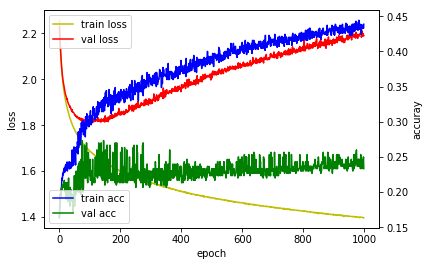

In [58]:
# 모델 학습시키기

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)

# 1. 데이터셋 준비하기

# 훈련셋과 시험셋 로딩
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
Y_val = Y_train[50000:]
X_train = X_train[:50000]
Y_train = Y_train[:50000]

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

X_train = X_train[train_rand_idxs]
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
Y_val = Y_val[val_rand_idxs]

# 라벨링 전환
Y_train = np_utils.to_categorical(Y_train)
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 엮기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기

custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print ('epochs : ' + str(epoch_idx) )
    model.fit(X_train, Y_train, epochs=1, batch_size=10, validation_data=(X_val, Y_val), callbacks=[custom_hist])

# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(custom_hist.losses, 'y', label='train loss')
loss_ax.plot(custom_hist.vol_losses, 'r', label='val loss')

acc_ax.plot(custom_hist.accs, 'b', label='train acc')
acc_ax.plot(custom_hist.vol_accs, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
